# Paquetes

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos y separación en sets de entrenamiento y prueba

In [6]:
df=np.load("proyecto_training_data.npy")
df

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [21]:
train=df[0:int(len(df)*.8)]

In [22]:
test=df[int(len(df)*.8):len(df)+1]

In [23]:
len(train)

1168

In [24]:
len(test)

292

# Ánalisis exploratorio

In [25]:
columnas=["SalePrice","Quality","1stFloor","Rooms","YearBuilt","LotFrontage"]

SalePrice:
Media: 180590.28
Máximo: 755000.0
Mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95


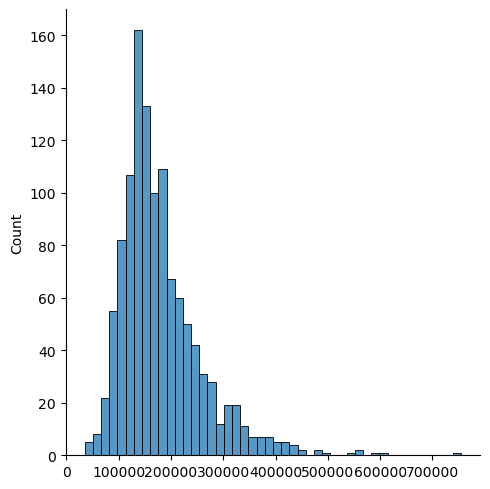


Quality:
Media: 6.1
Máximo: 10.0
Mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.38


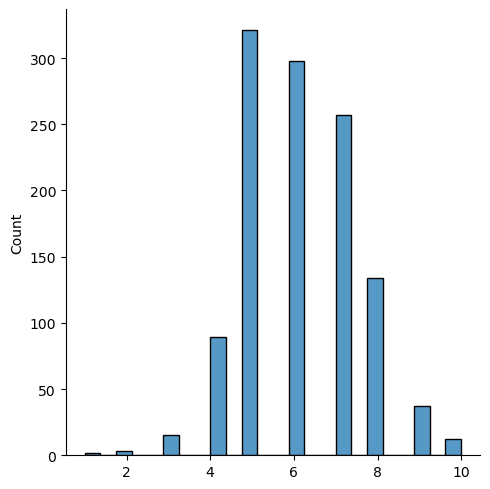


1stFloor:
Media: 1156.32
Máximo: 3228.0
Mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62


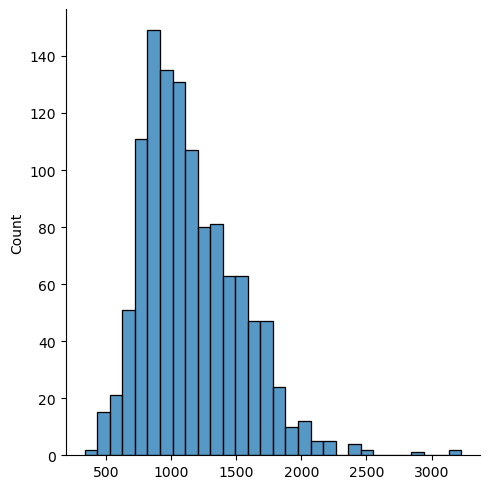


Rooms:
Media: 6.49
Máximo: 14.0
Mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.61


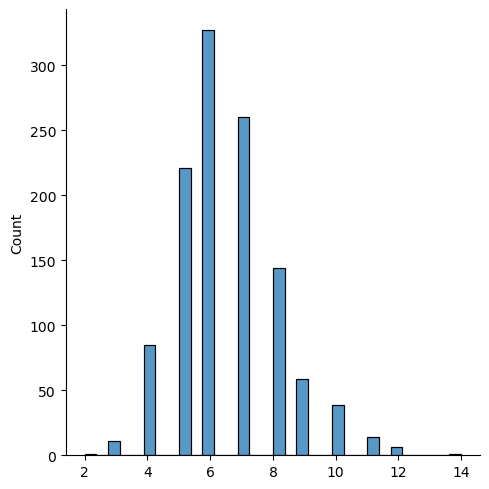


YearBuilt:
Media: 1971.45
Máximo: 2010.0
Mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.94


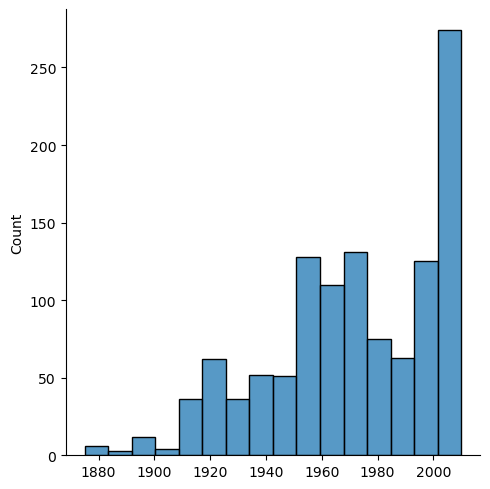


LotFrontage:
Media: 69.95
Máximo: 313.0
Mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.47


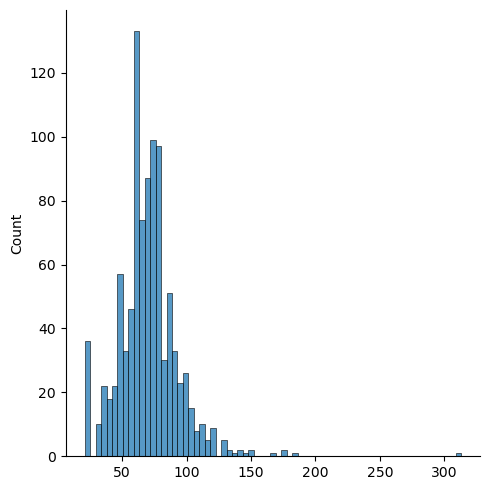

In [53]:
for i in range(0,len(columnas)):
    print(columnas[i]+":")
    print("Media:",round(np.nanmean(train[:,i]),2))
    print("Máximo:",round(np.nanmax(train[:,i]),2))
    print("Mínimo:",round(np.nanmin(train[:,i]),2))
    print("Rango:",round(np.nanmax(train[:,i]),2)-round(np.nanmin(train[:,i]),2))
    print("Desviación estándar:",round(np.nanstd(train[:,i]),2))
    sns.displot(train[:,i])
    plt.show()
    print("")

# Correlación entre precio y predictoras

In [61]:
train_df=pd.DataFrame(train, columns=columnas)

In [64]:
train_corr=train_df.corr()

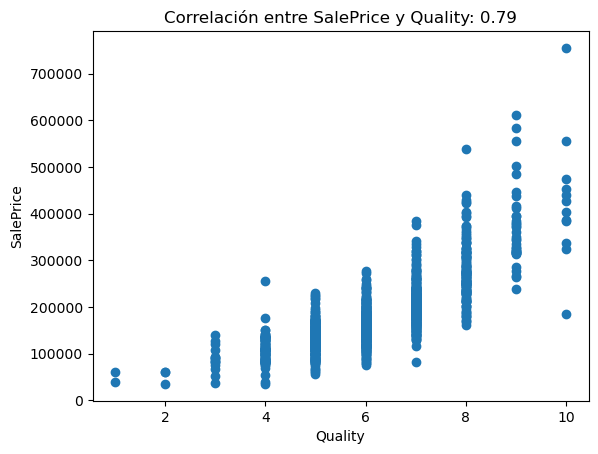

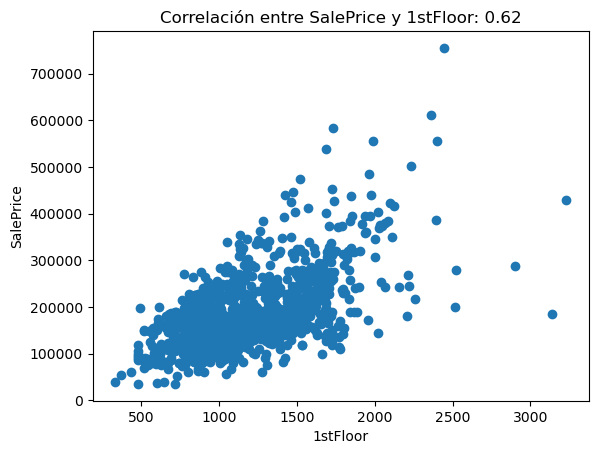

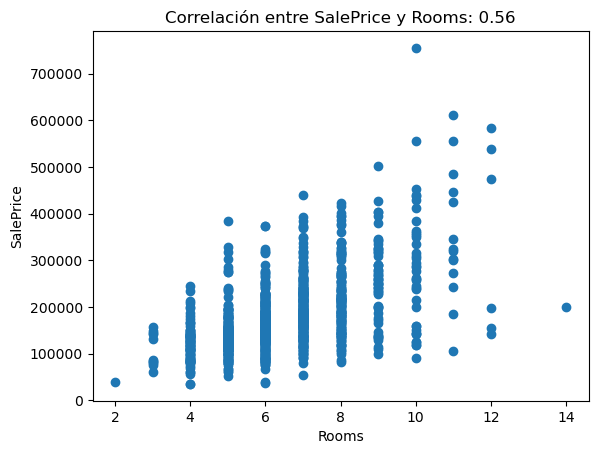

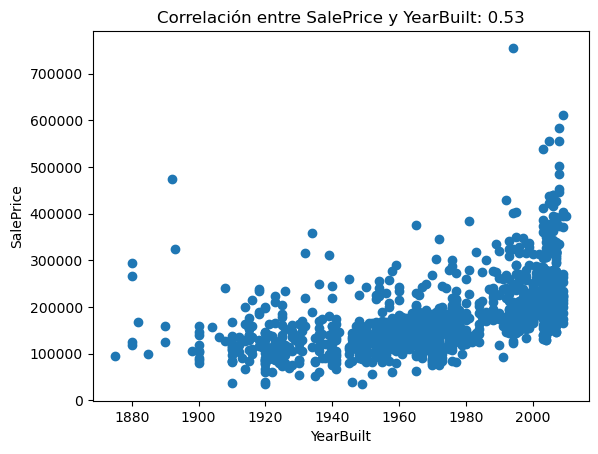

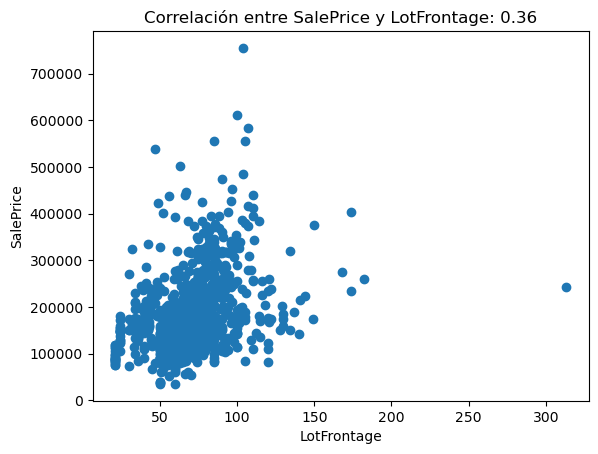

In [80]:
for i in columnas[1:]:
    plt.scatter(train_df[i], train_df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title("Correlación entre SalePrice y "+i+": "+str(round(train_corr["SalePrice"].loc[i],2)))
    plt.show()


Las dos variables con mayor poder predictivo son Quality y 1stFloor.

# Modelo de regresión lineal